### Classification - Logistic Regression - Sentiment Classification of Amazon Product Reviews

In [44]:
import re
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from collections import OrderedDict

# this allows plots to appear directly in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
products = pd.read_csv('amazon_baby.csv')

In [3]:
products = products.dropna()

In [4]:
vect = CountVectorizer(stop_words='english')
train_dtm = vect.fit_transform(products.review)

In [5]:
data_train = products[['name','rating']]

In [6]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [11]:
data_train['awesome'] = train_dtm.getcol(vect.vocabulary_.__getitem__('awesome')).toarray()
data_train['great'] = train_dtm.getcol(vect.vocabulary_.__getitem__('great')).toarray()
data_train['fantastic'] = train_dtm.getcol(vect.vocabulary_.__getitem__('fantastic')).toarray()
data_train['amazing'] = train_dtm.getcol(vect.vocabulary_.__getitem__('amazing')).toarray()
data_train['love'] = train_dtm.getcol(vect.vocabulary_.__getitem__('love')).toarray()
data_train['horrible'] = train_dtm.getcol(vect.vocabulary_.__getitem__('horrible')).toarray()
data_train['bad'] = train_dtm.getcol(vect.vocabulary_.__getitem__('bad')).toarray()
data_train['terrible'] = train_dtm.getcol(vect.vocabulary_.__getitem__('terrible')).toarray()
data_train['awful'] = train_dtm.getcol(vect.vocabulary_.__getitem__('awful')).toarray()
data_train['wow'] = train_dtm.getcol(vect.vocabulary_.__getitem__('wow')).toarray()
data_train['hate'] = train_dtm.getcol(vect.vocabulary_.__getitem__('hate')).toarray()
data_train.head(10)

,name,rating,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
0,Planetwise Flannel Wipes,3,0,0,0,0,0,0,0,0,0,0,0
1,Planetwise Wipe Pouch,5,0,0,0,0,1,0,0,0,0,0,0
2,Annas Dream Full Quilt with 2 Shams,5,0,0,0,0,0,0,0,0,0,0,0
3,Stop Pacifier Sucking without tears with Thumb...,5,0,0,0,0,2,0,0,0,0,0,0
4,Stop Pacifier Sucking without tears with Thumb...,5,0,1,0,0,1,0,0,0,0,0,0
5,Stop Pacifier Sucking without tears with Thumb...,5,0,1,0,0,0,0,0,0,0,0,0
6,A Tale of Baby\'s Days with Peter Rabbit,4,0,0,0,0,0,0,0,0,0,0,0
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",5,0,0,0,0,0,0,0,0,0,0,0
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",5,0,0,1,0,0,0,0,0,0,0,0
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",4,0,0,0,0,0,0,0,0,0,0,0


In [12]:
awesome_products = data_train[data_train['awesome'] > 0]
awesome_products.head(10)

,name,rating,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
97,"IKEA KLADD PRICKAR Bib, blue, red",4,1,0,0,0,0,0,0,0,0,0,0
150,Pedal Farm Tractor,5,1,0,0,0,0,0,0,0,0,0,0
370,Baby Trend Diaper Champ,5,1,0,0,0,0,0,0,0,0,0,0
460,Baby Trend Diaper Champ,4,1,0,0,0,0,0,0,0,0,0,0
550,Baby Trend Diaper Champ,1,1,1,0,0,0,0,1,0,0,0,0
860,Safety 1st Tot-Lok Starter Set,5,1,0,0,0,0,0,0,0,0,0,0
1205,North States Industries Superyard XT Gate Exte...,5,1,1,0,0,0,0,1,0,0,0,1
1213,Thomas &amp; Friends - 3 Piece Dinnerware Set-...,5,1,0,0,0,0,0,0,0,0,0,0
1288,Munchkin Mozart Magic Cube,5,1,0,0,0,0,0,0,0,0,0,0
1301,Munchkin Mozart Magic Cube,4,1,2,0,0,0,0,0,0,1,0,0


In [18]:
# selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
sum_data = dict()
for word in selected_words:
    sum_data[word] = data_train[word].sum()

In [20]:
# word_count sum sorted by value
sorted_sum_data = OrderedDict(sorted(sum_data.items(), key=lambda t: t[1]))
sorted_sum_data

OrderedDict([('wow', 461), ('awful', 752), ('horrible', 1244), ('terrible', 1281), ('hate', 1285), ('fantastic', 1762), ('amazing', 2722), ('awesome', 4063), ('bad', 4947), ('love', 43790), ('great', 59416)])

In [22]:
len(awesome_products)

3825

In [23]:
import seaborn as sns

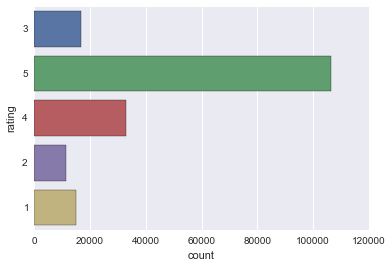

In [26]:
sns.countplot(y="rating", data=data_train);

##Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.

In [27]:
#ignore all 3* reviews
data_train = data_train[data_train['rating'] != 3]

In [35]:
#positive sentiment = 4* or 5* reviews
data_train['sentiment'] = data_train['rating'].map(lambda x : 1 if x >= 4 else 0)

In [38]:
data_train.head(10)

,name,rating,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,sentiment
1,Planetwise Wipe Pouch,5,0,0,0,0,1,0,0,0,0,0,0,1
2,Annas Dream Full Quilt with 2 Shams,5,0,0,0,0,0,0,0,0,0,0,0,1
3,Stop Pacifier Sucking without tears with Thumb...,5,0,0,0,0,2,0,0,0,0,0,0,1
4,Stop Pacifier Sucking without tears with Thumb...,5,0,1,0,0,1,0,0,0,0,0,0,1
5,Stop Pacifier Sucking without tears with Thumb...,5,0,1,0,0,0,0,0,0,0,0,0,1
6,A Tale of Baby\'s Days with Peter Rabbit,4,0,0,0,0,0,0,0,0,0,0,0,1
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",5,0,0,0,0,0,0,0,0,0,0,0,1
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",5,0,0,1,0,0,0,0,0,0,0,0,1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",4,0,0,0,0,0,0,0,0,0,0,0,1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",4,0,0,0,0,2,0,0,0,0,0,0,1


In [53]:
# fit a linear regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
#feature_cols = ['awesome']
X = data_train[feature_cols]
y = data_train.sentiment
logreg.fit(X, y)
sentiment_pred_class = logreg.predict(X)

In [54]:
# print the class predictions
sentiment_pred_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


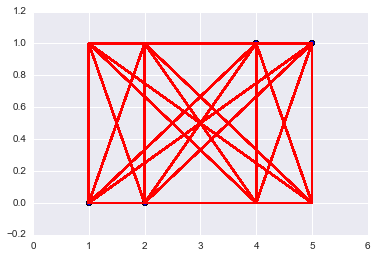

In [56]:
# plot the class predictions
plt.scatter(data_train.rating, data_train.sentiment)
plt.plot(data_train.rating, sentiment_pred_class, color='red')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

In [59]:
# store the predicted probabilites of class 1
sentiment_pred_prob = logreg.predict_proba(X)[:,1]

array([ 0.93799178,  0.79033313,  0.98379367, ...,  0.95586041,
        0.79033313,  0.93799178])

In [62]:
sentiment_pred_prob[data_train['sentiment'] < 1]

D:\Work\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([ 0.93799178,  0.93799178,  0.93799178, ...,  0.93799178,
        0.93799178,  0.93799178])

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


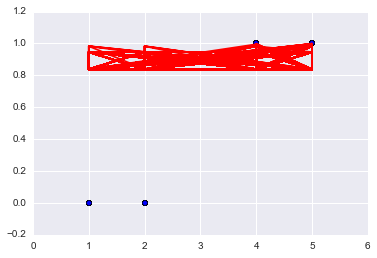

In [57]:
# plot the class predictions
plt.scatter(data_train.rating, data_train.sentiment)
plt.plot(data_train.rating, sentiment_pred_prob, color='red')

In [52]:
# examine some example predictions
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

[[ 0.05419938  0.94580062]]
[[ 0.01676085  0.98323915]]
[[ 0.00504525  0.99495475]]


What is this? The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.